In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [2]:
df = pd.read_csv('finaldata.csv')
df.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [3]:
df.shape

(10000, 18)

In [4]:
df.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

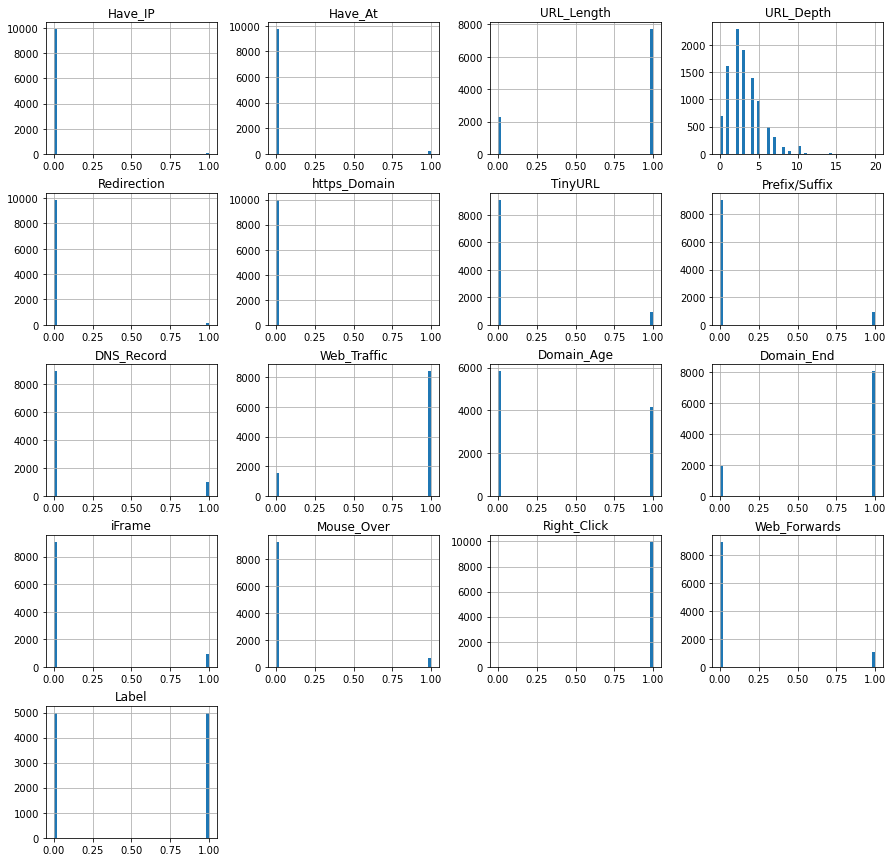

In [6]:
df.hist(bins = 50,figsize = (15,15))
plt.show()

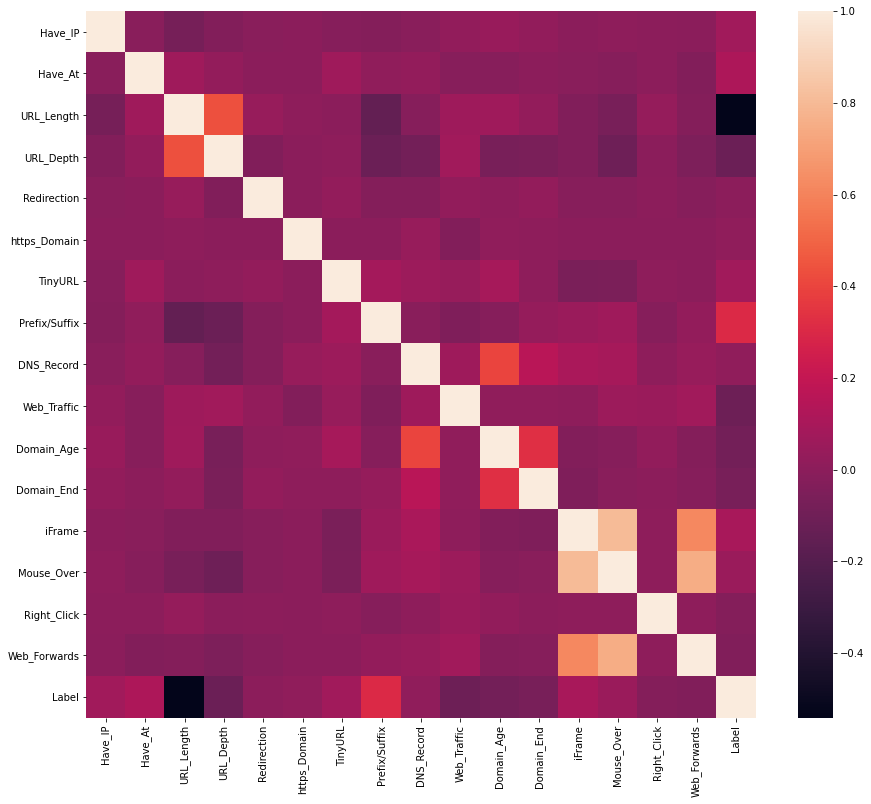

In [7]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

In [8]:
df.corr()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
Have_IP,1.000000,-0.011308,-0.076021,-0.030466,-0.008700,-0.001052,-0.023430,-0.023841,-0.011425,0.024279,0.047349,0.018799,-0.004701,0.007251,0.001968,-0.003487,0.074367
Have_At,-0.011308,1.000000,0.067844,0.029944,-0.000297,-0.002151,0.067122,0.018369,0.025073,-0.017002,-0.017072,0.001651,-0.008294,-0.021728,0.004025,-0.030246,0.118419
URL_Length,-0.076021,0.067844,1.000000,0.439378,0.038482,0.007656,-0.005318,-0.146102,-0.019508,0.063717,0.071029,0.028755,-0.039903,-0.068104,0.030833,-0.023651,-0.541287
URL_Depth,-0.030466,0.029944,0.439378,1.000000,-0.040189,-0.000478,0.010980,-0.114919,-0.086073,0.075315,-0.070101,-0.061798,-0.039297,-0.105889,-0.002657,-0.051248,-0.119707
Redirection,-0.008700,-0.000297,0.038482,-0.040189,1.000000,-0.001655,0.026634,-0.025581,-0.027654,0.018784,0.012581,0.025758,-0.012876,-0.017346,0.003096,-0.023193,0.002600
https_Domain,-0.001052,-0.002151,0.007656,-0.000478,-0.001655,1.000000,-0.004456,-0.004534,0.042243,-0.033112,0.016837,0.006852,-0.004472,-0.003778,0.000374,-0.004852,0.014144
TinyURL,-0.023430,0.067122,-0.005318,0.010980,0.026634,-0.004456,1.000000,0.087421,0.059078,0.040888,0.095944,0.006812,-0.062000,-0.054771,0.008339,-0.003508,0.072921
Prefix/Suffix,-0.023841,0.018369,-0.146102,-0.114919,-0.025581,-0.004534,0.087421,1.000000,-0.006793,-0.046843,-0.019954,0.031711,0.050594,0.070263,-0.017527,0.030102,0.302705
DNS_Record,-0.011425,0.025073,-0.019508,-0.086073,-0.027654,0.042243,0.059078,-0.006793,1.000000,0.065776,0.398583,0.162210,0.103266,0.094410,0.008861,0.042050,0.015943
Web_Traffic,0.024279,-0.017002,0.063717,0.075315,0.018784,-0.033112,0.040888,-0.046843,0.065776,1.000000,0.013681,0.015998,0.006990,0.057473,0.051495,0.073485,-0.108793


In [9]:
df.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [10]:
df_new = df.drop(['Domain'], axis = 1).copy()

In [11]:
df_new.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [12]:
df_new = df_new.sample(frac=1).reset_index(drop=True)
df_new.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,8,0,0,0,0,1,1,1,1,1,0,1,0,1
1,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,0,1
2,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0,0,1,2,0,0,0,0,0,0,1,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,0,0,0,1,0,0,1,0,1


In [13]:
y = df_new['Label']
X = df_new.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [14]:
y = df_new['Label']
X = df_new.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.053s...
[t-SNE] Computed neighbors for 10000 samples in 0.895s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.131222
[t-SNE] KL divergence after 1000 iterations: 0.408775


[Text(0.5, 1.0, ' T-SNE projection')]

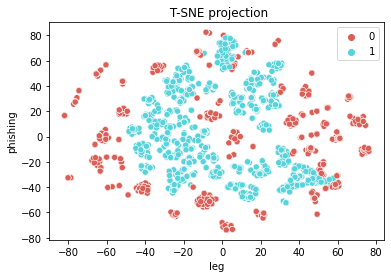

In [16]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(df_new)
df = pd.DataFrame()
df["y"] = y
df["leg"] = z[:,0]
df["phishing"] = z[:,1]

sns.scatterplot(x="leg", y="phishing", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title=" T-SNE projection")

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
Machine_learning_Model = []
accuracy_train = []
accuracy_test = []

In [20]:
def storeResults(model, a,b):
    Machine_learning_Model.append(model)
    accuracy_train.append(round(a, 3))
    accuracy_test.append(round(b, 3))

In [21]:

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth = 5)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [22]:
y_test_decision_tree = decision_tree.predict(X_test)
y_train_decision_tree = decision_tree.predict(X_train)

In [23]:
accuracy_train_tree = accuracy_score(y_train,y_train_decision_tree )
accuracy_test_tree = accuracy_score(y_test,y_test_decision_tree)

print("Decision Tree Accuracy using training Data:{:.2f}".format(accuracy_train_tree))
print("Decision Tree Accuracy using test Data: {:.2f}".format(accuracy_test_tree))

Decision Tree Accuracy using training Data:0.81
Decision Tree Accuracy using test Data: 0.82


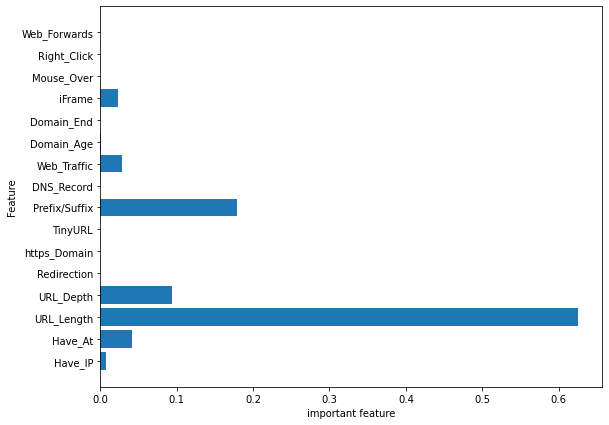

In [26]:
plt.figure(figsize=(9,7))
new_features = X_train.shape[1]
plt.barh(range(new_features ), decision_tree.feature_importances_, align='center')
plt.yticks(np.arange(new_features ), X_train.columns)
plt.xlabel("important feature")
plt.ylabel("Feature")
plt.show()